# Intro
In this notebook, we modify environments by adding and removing walls.

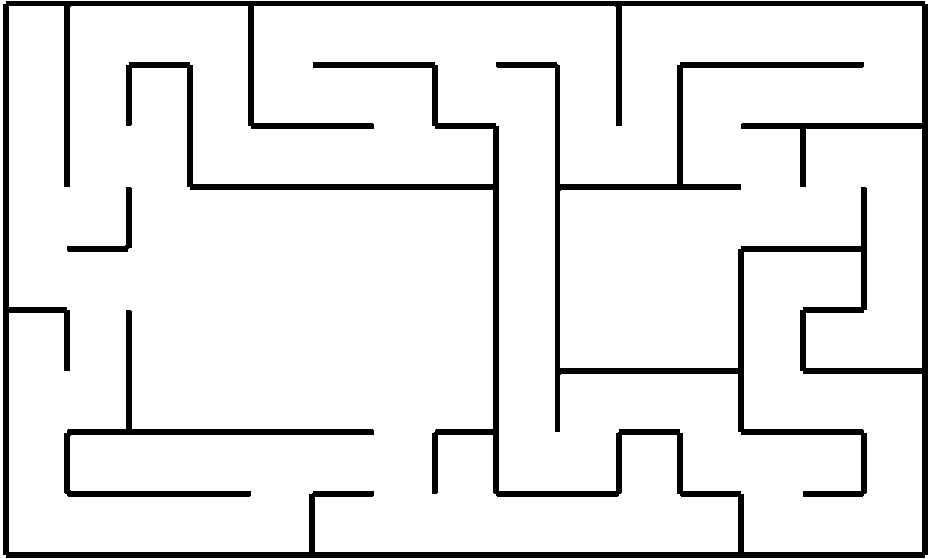

In [1]:
from IPython.display import Image
Image("../system/controller/simulation/environment/Savinov_val3/maze_topview_binary.png")

In [3]:
def wall_dimensions(wall_file_name):
    with open(wall_file_name) as file:
        lines = file.readlines()
    vertices = filter(lambda line: line.startswith('v '), lines)
    vertices = ((float(v) for v in line.split(' ')[1:4]) for line in vertices)
    x, y, z = (set(values) for values in zip(*vertices))
    assert z == { -0.25, 0.75 } and len(x) == 2 and len(y) == 2
    return (min(x), min(y), max(x), max(y))
wall_dimensions('../system/controller/simulation/environment/Savinov_val3/walls/6.obj')

(-1.0, 2.949998, 0.0, 3.049998)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from system.controller.simulation.environment.map_occupancy import environment_dimensions

env_model = "Savinov_val3"

def draw_walls(walls_by_color, wall_numbers=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    (x0, y0), (x1, y1) = environment_dimensions(env_model)
    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    ax.set_aspect('equal')

    for color, walls in walls_by_color.items():
        for name, (x0, y0, x1, y1) in walls.items():
            wall = plt.Rectangle((x0, y0), x1-x0, y1-y0, color=color)
            ax.add_artist(wall)

            if wall_numbers:
                x, y = (x0 + x1) / 2, (y0 + y1) / 2
                text = str(name)
                # Copied from https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py
                for path_effects in [[withStroke(linewidth=4, foreground='white')], []]:
                    text_color = 'white' if path_effects else 'black'
                    ax.text(x, y, text, zorder=100,
                            ha='center', va='top', weight='bold', color=text_color,
                            style='italic', fontfamily='monospace',
                            path_effects=path_effects)

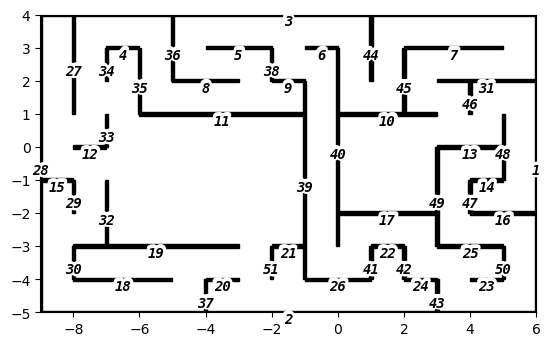

In [4]:
default_walls = {}
for i in range(1, 51+1):
    default_walls[i] = wall_dimensions(f'../system/controller/simulation/environment/Savinov_val3/walls/{i}.obj')

draw_walls({'black': default_walls})

In [5]:
def shorten_wall(walls, index, end, by):
    x0, y0, x1, y1 = walls[index]
    if end == 'bottom':
        y0 += by
    elif end == 'top':
        y1 -= by
    elif end == 'left':
        x0 += by
    elif end == 'right':
        x1 -= by
    else:
        raise ValueError()
    walls[index] = (x0, y0, x1, y1)
def delete_wall(walls, index):
    del walls[index]
def add_wall(walls, dims):
    if len(walls) == 0:
        key = 1
    else:
        key = max(walls.keys()) + 1
    x0, y0, x1, y1 = dims
    if x0 == x1:
        x0 -= 0.05; x1 += 0.05
    elif y0 == y1:
        y0 -= 0.05; y1 += 0.05
    elif (y1 - y0) <= (0.1 + 1e-6) or (x1 - x0) <= (0.1 + 1e-6):
        pass
    else:
        raise ValueError(f"Wall is neither horizontal nor vertical: {x0, y0, x1, y1, (x1 - x0), (y1 - y0)}")
    walls[key] = (x0, y0, x1, y1)

## Actually create the walls as .OBJ files

In [10]:
help(os.system)

Help on built-in function system in module posix:

system(command)
    Execute the command in a subshell.



In [24]:
#!mkdir ../system/controller/simulation/environment/final_layout
#!cp ../system/controller/simulation/environment/Savinov_val3/walls/ ../system/controller/simulation/environment/final_layout -r

def shorten_wall(walls, index, end, by):
    x0, y0, x1, y1 = walls[index]
    if end == 'bottom':
        y0 += by
    elif end == 'top':
        y1 -= by
    elif end == 'left':
        x0 += by
    elif end == 'right':
        x1 -= by
    else:
        raise ValueError()

    delete_wall(walls, index)
    add_wall(walls, (x0, y0, x1, y1), key=index)
def delete_wall(walls, index):
    #os.system(f'rm ../system/controller/simulation/environment/final_layout/walls/{index}.obj')
    del walls[index]
def add_wall(walls, dims, key=None):
    if key is None:
        if len(walls) == 0:
            key = 1
        else:
            key = max(walls.keys()) + 1
    x0, y0, x1, y1 = dims
    if x0 == x1:
        x0 -= 0.05; x1 += 0.05
    elif y0 == y1:
        y0 -= 0.05; y1 += 0.05
    elif (y1 - y0) <= (0.1 + 1e-6) or (x1 - x0) <= (0.1 + 1e-6):
        pass
    else:
        raise ValueError(f"Wall is neither horizontal nor vertical: {x0, y0, x1, y1, (x1 - x0), (y1 - y0)}")
    walls[key] = (x0, y0, x1, y1)
    """
    os.system('cat ../system/controller/simulation/environment/final_layout/walls/template.obj.mustache | sed "'
        f's/{{{{ x0 }}}}/{x0:.6f}/;'
        f's/{{{{ x1 }}}}/{x1:.6f}/;'
        f's/{{{{ y0 }}}}/{y0:.6f}/;'
        f's/{{{{ y1 }}}}/{y1:.6f}/;'
        f's/{{{{ name }}}}/{key}.obj/;'
    f'" > ../system/controller/simulation/environment/final_layout/walls/{key}.obj')
    """

mkdir: das Verzeichnis „../system/controller/simulation/environment/final_layout“ kann nicht angelegt werden: Die Datei existiert bereits


## Finally

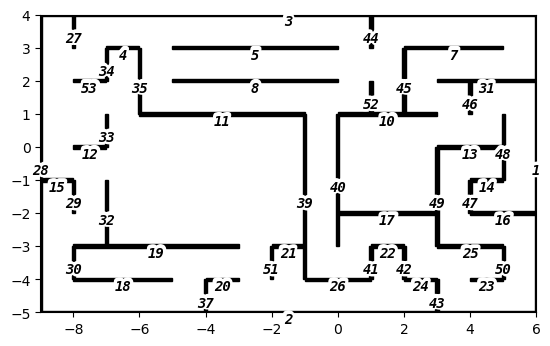

In [6]:
walls = default_walls.copy()
delete_wall(walls, 36)
delete_wall(walls, 38)
shorten_wall(walls, 40, 'top', 2)
shorten_wall(walls, 39, 'top', 1)
shorten_wall(walls, 27, 'bottom', 2)
delete_wall(walls, 9)
delete_wall(walls, 6)
shorten_wall(walls, 8, 'right', -3)
shorten_wall(walls, 5, 'right', -2)
shorten_wall(walls, 5, 'left', -1)
shorten_wall(walls, 44, 'bottom', 1)
add_wall(walls, (1, 1, 1, 2))
add_wall(walls, (-8, 2, -7, 2))
draw_walls({'black': walls})

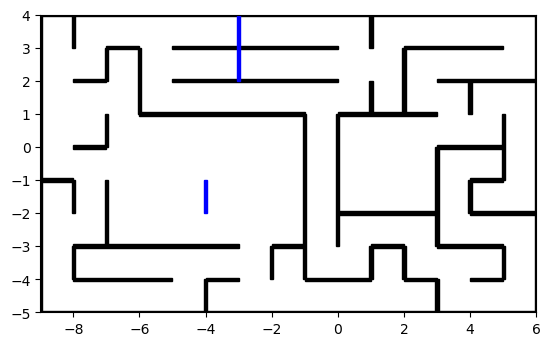

In [8]:
doors = {}
open_doors = {}
add_wall(doors, (-3, 2, -3, 3))
add_wall(doors, (-3, 3, -3, 4))
add_wall(doors, (-4, -2, -4, -1))
add_wall(open_doors, walls[43])
add_wall(open_doors, walls[34])

fig, ax = plt.subplots()
draw_walls({'black': walls, 'blue': doors, 'red': open_doors}, wall_numbers=False, ax=ax)
fig.savefig('/tmp/remove_walls.png')

In [11]:
from system.controller.simulation.environment.map_occupancy import MapLayout
layout = MapLayout('final_layout')

In [13]:
path = layout.find_path((2.5, -4.5), (4.5, -1.5))

In [16]:
import numpy as np
path = np.array(path)
with open('final_layout_path.npy', 'wb') as file:
    np.save(file, path)

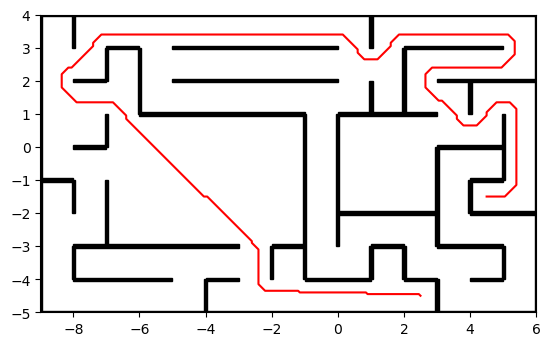

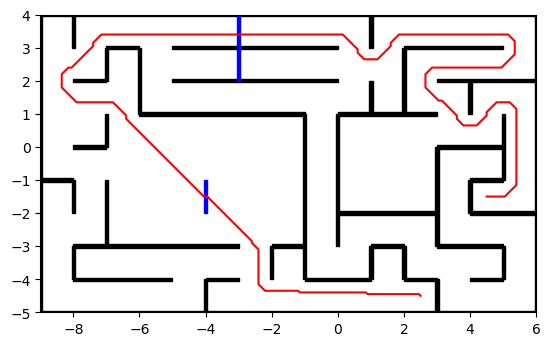

In [20]:
fig, ax = plt.subplots()
draw_walls({'black': walls}, wall_numbers=False, ax=ax)
ax.plot(path[:, 0], path[:, 1], 'red')
fig.savefig('../../report/figures/maps/final_layout.png')

fig, ax = plt.subplots()
draw_walls({'black': walls, 'blue': doors}, wall_numbers=False, ax=ax)
ax.plot(path[:, 0], path[:, 1], 'red')
fig.savefig('../../report/figures/maps/final_layout+doors.png')

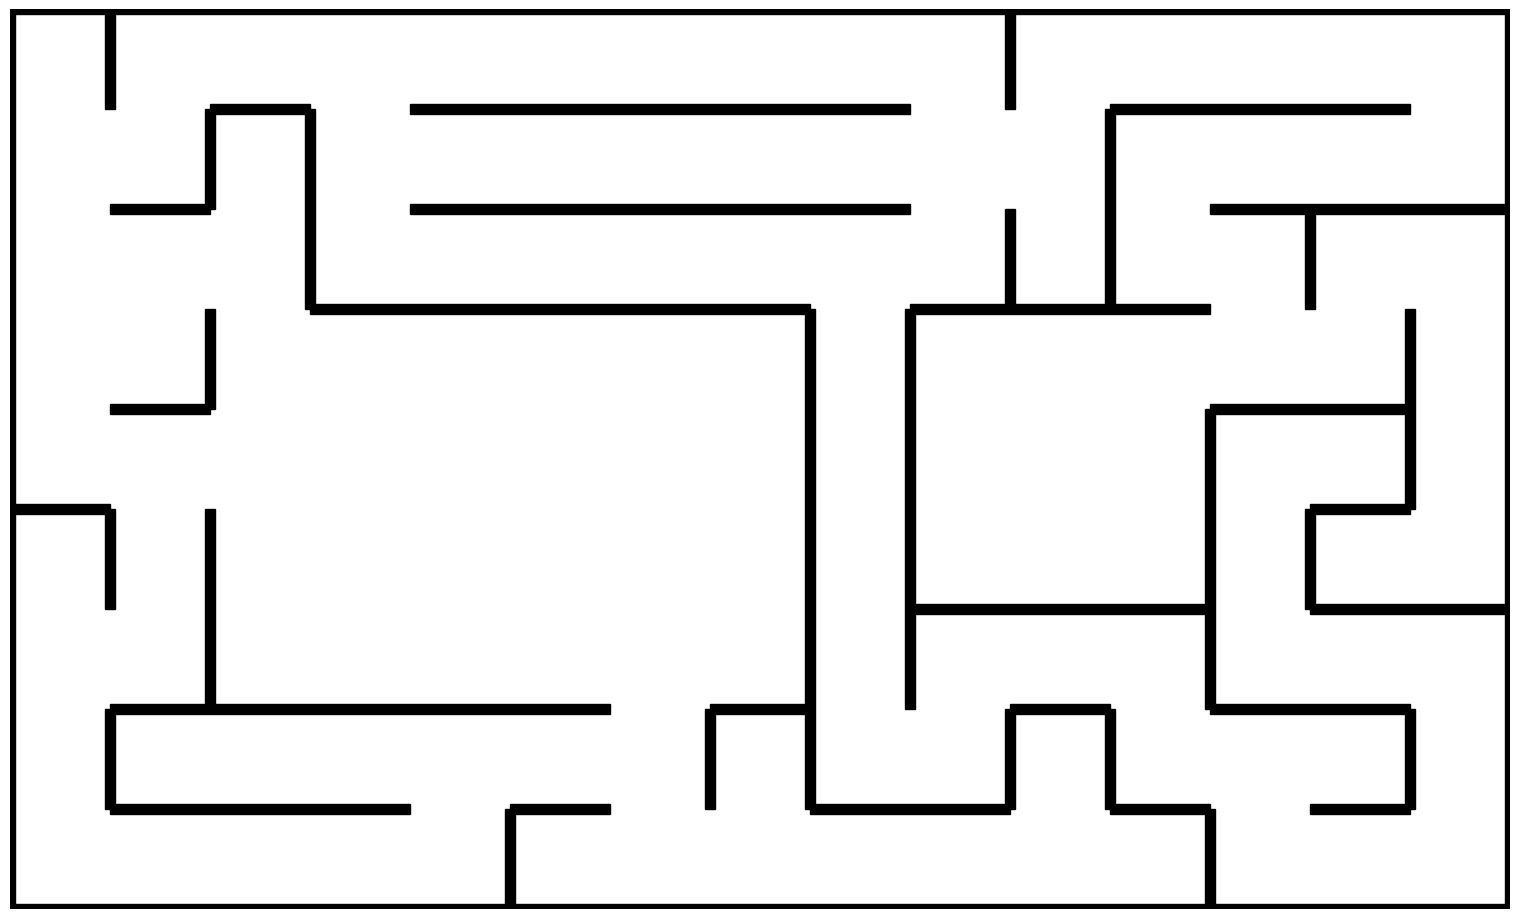

In [36]:
import numpy as np

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
draw_walls({'black': walls}, wall_numbers=False, ax=ax)
ax.axis('off')
fig.set_size_inches(15, 9)
fig.savefig('../system/controller/simulation/environment/final_layout/maze_topview_binary.png')